# Graded Assignment 2

Simo Smeets

# Packages

# Assignment 1

First load the `tidyverse` package:

In [50]:
library(tidyverse)
library(ggplot2)

##  Assignment 1a

Read the data file _graded_assignment_2.csv_ from disk:

In [51]:
data1 <- read.csv('graded_assignment_2.csv', sep= ';')
head(data1)

ID,Group,FKG,DKG,Gender,Elderly,Age
1,17,0,0,male,65+,80-84
2,34,0,0,female,65+,65-69
3,31,1,0,female,65-,50-54
4,22,1,0,female,65-,5-9
5,35,0,0,female,65+,70-74
6,19,1,1,male,65+,90-94


## Assignment 1b

Add column "Health_status" with containing values _1_ (Healthy) and _0_ (Unhealthy).
A person is Healthy, when `FKG` equals 0 and `DKG` equals 0.

So

| FKG | DKG | Health_status   |
|-----|-----|--------------   |
| 0   | 0   | 1               |
| 1   | 0   | 0               |
| 0   | 1   | 0               |
| 1   | 1   | 0               |

Hint: you can use `ifelse()`:

In [46]:
data2 <- data1 %>%
    mutate(Health_status = ifelse((FKG ==1 & DKG == 1) | (FKG == 0 & DKG == 1)| (FKG == 1 & DKG == 0),'0','1'))
head(data2)

ID,Group,FKG,DKG,Gender,Elderly,Age,Health_status
1,17,0,0,male,65+,80-84,1
2,34,0,0,female,65+,65-69,1
3,31,1,0,female,65-,50-54,0
4,22,1,0,female,65-,5-9,0
5,35,0,0,female,65+,70-74,1
6,19,1,1,male,65+,90-94,0


In the next datacamp course you will learn more about the package `dplyr`. For now we just give you some code. You can run the following script.

First, we want to make "Health_status" a factor instead of a character

In [47]:
data2 <- data2 %>%
  mutate(Health_status = as.numeric(Health_status))
str(data2)

'data.frame':	10000 obs. of  8 variables:
 $ ID           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Group        : int  17 34 31 22 35 19 1 30 29 8 ...
 $ FKG          : int  0 0 1 1 0 1 0 1 0 1 ...
 $ DKG          : int  0 0 0 0 0 1 1 1 0 1 ...
 $ Gender       : Factor w/ 2 levels "female","male": 2 1 1 1 1 2 2 1 1 2 ...
 $ Elderly      : Factor w/ 2 levels "65-","65+": 2 2 1 1 2 2 1 1 1 1 ...
 $ Age          : Factor w/ 20 levels "0-4","10-14",..: 17 14 11 10 15 19 1 9 8 7 ...
 $ Health_status: num  1 1 0 0 1 0 0 0 1 0 ...


Then, we want to count the number of healthy and unhealthy males and females

In [48]:
data3 <- data2 %>%
  group_by(Gender, Health_status) %>%
 summarise(Count_observations = n()) %>%
  mutate(Health_status=as.factor(Health_status))

data3

Gender,Health_status,Count_observations
female,0,3723
female,1,1258
male,0,3734
male,1,1285


## Assignment 2

Recreate with the dataframe "data3" the following barchart ![](../Sourcedata/barchart.png)

* Hint: see for changing the [legends and colors](http://www.cookbook-r.com/Graphs/Legends_(ggplot2)/)
* Hint: the "green" color is in fact the color "greenyellow"
* Hint: see for the [themes](http://ggplot2.tidyverse.org/reference/ggtheme.html): 



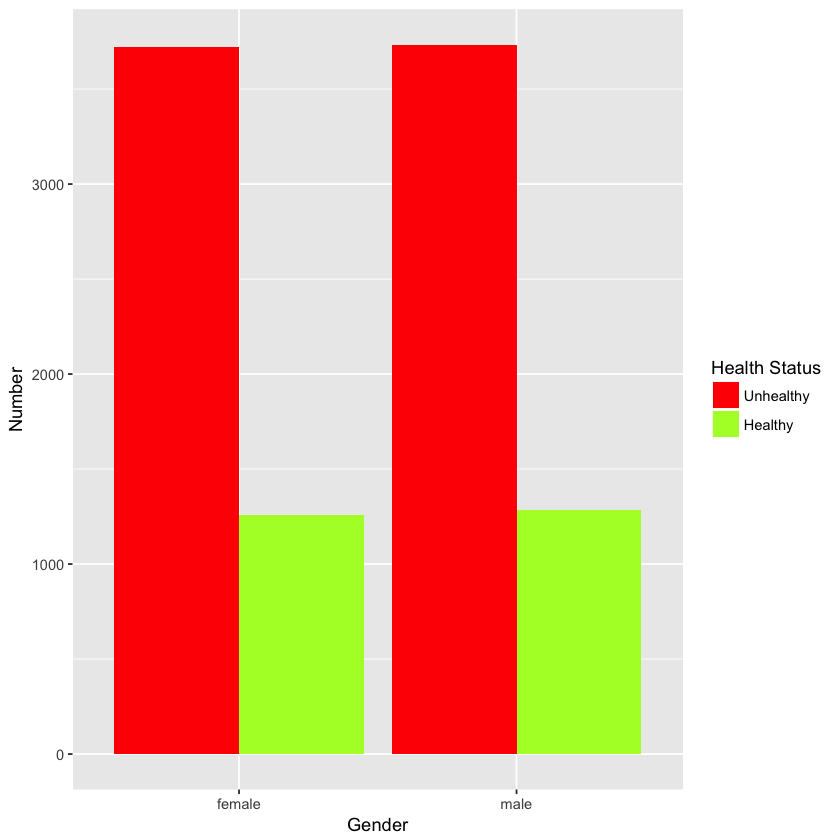

In [49]:
barchart_data3 <- ggplot(data3, aes(x=Gender,y=Count_observations, fill = Health_status))

val = c("red1", "greenyellow")
lab = c("Unhealthy", "Healthy")
barchart_data3 + 
geom_col(position = "dodge") +
scale_x_discrete("Gender") + 
scale_y_continuous("Number") +
scale_fill_manual("Health Status",
                 values=val,
                 labels=lab)

End notebook